**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 2 -Agrupacion

In [92]:
import pandas as pd

Carga de datos

In [93]:
df = pd.read_csv('202420_Laboratorio 1 - Regresión_train_data.csv')

In [94]:
df.shape

(1000, 23)

### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [95]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


### Estadísticas descriptivas

In [96]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Las estadísticas descriptivas nos permiten observar varias cosas:

1. **Count** -> Existen valores faltantes en las columnas SBP, DBP, HR, RR, BT, Saturación.
2. **Mean y std** -> Nos permiten tener una primera imagen mental de cómo se distribuyen los datos.
3. **Mean, std, min, max** -> Es evidente que la variable objetivo está extremadamente dispersa y muy posiblemente tiene casos atípicos.

Es importante recalcar que en la tabla se presentan varias estadísticas de las variables categóricas codificadas; sin embargo, muchas de estas, como el promedio y la desviación estándar, no tienen sentido y, por lo tanto, no sirven para sacar conclusiones.

#### Niveles de variables categóricas

In [97]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

Debido a que el método `describe()` no nos proporciona información útil sobre las variables categóricas, investigaremos los niveles y el número de niveles por variable categórica. Esto nos permitirá comparar la información con el diccionario de datos y tomar decisiones informadas para la limpieza de datos y la selección de variables. Es posible observar las siguientes cosas:

1. **Modo_Llegada**: El diccionario de datos tiene codificación de 1 a 5, pero los datos tienen niveles de 1 a 7.
2. **Dolor**: Está codificado como 0 o 1 en el diccionario de datos; sin embargo, en el dataset existen las categorías 1 y 2.
3. **dolor_NRS**: Tiene un error de formato, "#BOÞ!".
4. **Error_Triaje**: No es binaria, por lo que es necesario preguntar su significado.
5. **Queja_principal y Diagnostico_En_Urgencias**: No se pueden tratar como variables categóricas debido a que tienen demasiados niveles.

**Análisis de las observaciones**

In [98]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

Como determinamos que dolor_NRS tenía un error de formato, necesitamos saber a cuántas filas afecta este error para decidir cómo proceder. Es posible observar que existen demasiadas instancias del error como para eliminar las filas entonces debemos considerar eliminar la columna o imputar el error.

In [99]:
d_dolor = df[df['Dolor']==0]
d_dolor['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    438
Name: count, dtype: int64

Primero consideramos la opción de imputar el error. Para ello, analizamos su causa y la posible intención del recopilador de datos. Observamos que de las 440 instancias con el error, 438 ocurren cuando el paciente no reporta dolor. Por lo tanto, asumimos que el error se produce cuando el paciente no tiene dolor y no se le asigna un valor de dolor_NRS.

In [100]:
d_murte = df[df['Disposicion']==6]

d_dolor['dolor_NRS'].value_counts()


dolor_NRS
#BOÞ!    438
Name: count, dtype: int64

Ahora revisamos si el error #BOÞ! se debe a que el paciente está muerto. Es posible observar que cuando el paciente está muerto el valor de dolor_NRS es #BOÞ!.

In [101]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

Revisamos los niveles del modo llegada debido a que existen dos niveles que no están explicado en el diccionario de datos.

In [102]:
#Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


Revisión de valores faltantes para cada una de las columnas. Las columnas SBP, DBP, HR, RR y BT tienen faltantes.

In [103]:
t=10100
above_t = df[df["Duracion_Estancia_Min"] > t].shape[0]
below_t = df[df["Duracion_Estancia_Min"] <= t].shape[0]

print(f"Ocurrencias por encima de {t}: {above_t}")
print(f"Ocurrencias por debajo o igual a {t}: {below_t}")


df["Duracion_Estancia_Min"].describe()


Ocurrencias por encima de 10100: 50
Ocurrencias por debajo o igual a 10100: 950


count      1000.000000
mean      12792.480000
std       87721.151446
min           0.000000
25%         132.750000
50%         270.500000
75%         620.000000
max      709510.000000
Name: Duracion_Estancia_Min, dtype: float64

Revisión de como se distribuye la variable objetivo. Recordando que existian valores extremos.

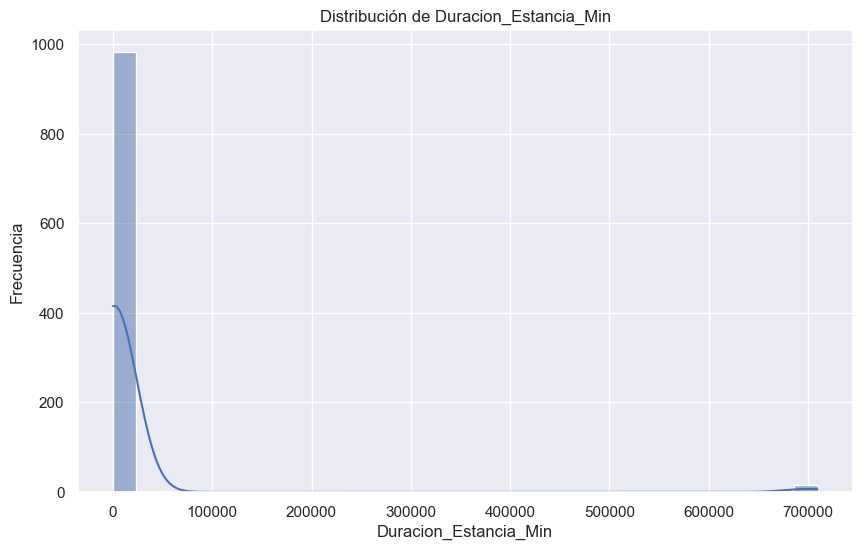

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

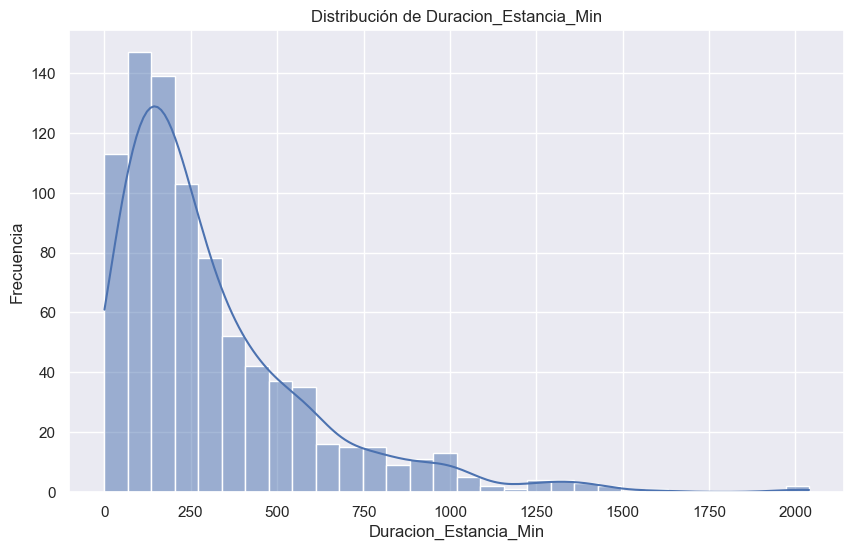

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

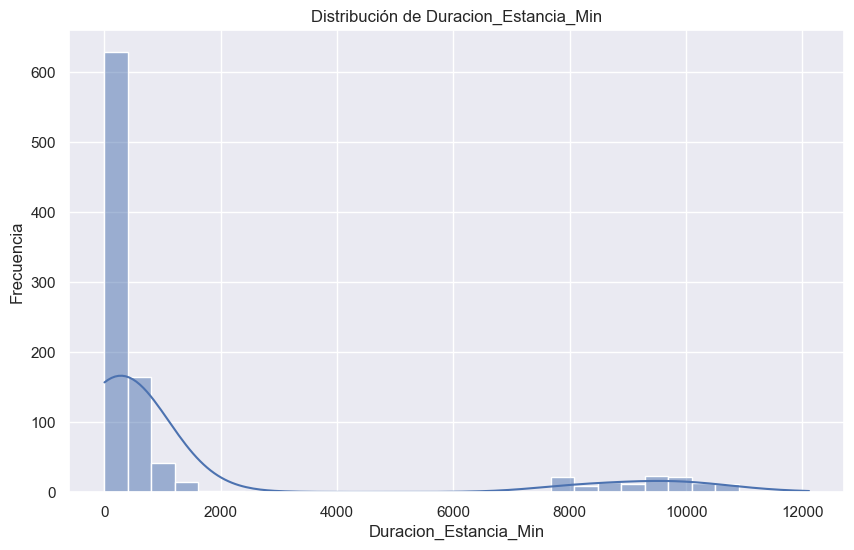

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 14000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

En las graficas se puede observar que existen valores atípicos que pueden afectar el ajuste del modelo.

In [107]:
# Eliminar las filas donde Duracion_Estancia_Min > 10100
df = df[df["Duracion_Estancia_Min"] <= 2100]
df["Duracion_Estancia_Min"].describe()

count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

Decidimos quitar los valores atípicos para mejorar el rendimiento del modelo en los casos mas comunes. Sin embargo, esto significa que el modelo no se funcionará muy bien para valores extremos.

### Resumen de las Variables

| Variable                  | Tipo                                     | Valores                 | Media     | Desviación Estándar | Rango                   | Número de Datos |
|---------------------------|------------------------------------------|-------------------------|-----------|---------------------|-------------------------|-----------------|
| Grupo                     | Categórica (1 o 2)                       | 1, 2                    | 1.45      | 0.50                | 1 a 2                   | 1000            |
| Sexo                      | Categórica (1=Hombre, 2=Mujer)           | 1, 2                    | 1.51      | 0.50                | 1 a 2                   | 1000            |
| Edad                      | Continua                                 | -                       | 53.89     | 19.83               | 16 a 94 años            | 1000            |
| Modo_Llegada              | Categórica con 7 niveles                 | 1 a 7                   | 2.81      | 0.80                | 1 a 7                   | 1000            |
| Lesion                    | Categórica binaria (1=Sí, 2=No)          | 1, 2                    | 1.20      | 0.40                | 1 a 2                   | 1000            |
| Queja_Principal           | Categórica (descripción textual)         | Variados*                | -         | -                   | -                       | 1000            |
| Estado_Mental             | Categórica ordinal (1 a 4)               | 1 a 4                   | 1.10      | 0.43                | 1 a 4                   | 1000            |
| Dolor                     | Categórica binaria (0=No, 1=Sí)          | 0, 1                    | 0.56      | 0.50                | 0 a 1                   | 1000            |
| dolor_NRS                 | Categórica ordinal (0 a 10)              | 1 a 10                  | 1.10      | 1.68                | 1 a 10                  | 1000            |
| SBP (Presión Sistólica)   | Continua                                 | -                       | 133.49    | 27.16               | 50 a 275 mmHg           | 983             |
| DBP (Presión Diastólica)  | Continua                                 | -                       | 79.57     | 15.17               | 31 a 160 mmHg           | 979             |
| HR (Frecuencia Cardíaca)  | Continua                                 | -                       | 84.40     | 16.30               | 32 a 148 lpm            | 988             |
| RR (Frecuencia Respiratoria) | Continua                             | -                       | 19.45     | 2.07                | 14 a 30 rpm             | 985             |
| BT (Temperatura Corporal) | Continua                                 | -                       | 36.56°C   | 0.52                | 35 a 39.8°C             | 989             |
| Saturacion                | Continua                                 | -                       | 97.05%    | 1.41                | 95 a 100%               | 444             |
| KTAS_enfermera            | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.33      | 0.86                | 1 a 5                   | 1000            |
| Diagnostico_En_Urgencias  | Categórica (descripción textual)         | Variados*               | -         | -                   | -                       | 1000            |
| Disposicion               | Categórica con 7 niveles                 | 1 a 7                   | 3.33      | 1.16                | 1 a 7                   | 1000            |
| KTAS_experto              | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.26      | 0.87                | 1 a 5                   | 1000            |
| Grupo_De_Error            | Categórica ordinal (0 a 9)               | 0 a 9                   | 0.57      | 1.59                | 0 a 9                   | 1000            |
| Duracion_Estancia_Min     | Continua                                 | -                       | 12792.48  | 87721.15            | 0 a 709510 minutos      | 1000            |
| Duracion_KTAS_Min         | String                                 | -                       | 2.00      | 1.20                | 1 a 7 minutos           | 1000            |
| Error_Triaje              | Categórica          | 0 a 2                    | 0.25      | 0.63                | 0 a 2                   | 1000            |

*Las variables Queja_Principal y Diagnostico_En_Urgencia tienen 347 y 489 categorías respectivamente


### Limpieza de datos

In [108]:
#Se copia el df para no alterar los datos originales.
data = df.copy()

In [109]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    849.000000
mean       5.952544
std        3.537711
min        1.000000
25%        3.180000
50%        5.000000
75%        7.850000
max       17.370000
Name: Duracion_KTAS_Min, dtype: float64

Se debe convertir la variable Duracion_KTAS_Min a float para que se pueda utilizar en el modelo.

In [110]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

Queja_Principal y Diagnostico_En_Urgencias son columnas de texto y no las usaremos en el primer modelo, después exploraremos el procesamiento de texto. La saturación tiene casi la mitad de valores faltantes y por esto decidimos no utilizarla.

In [111]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))

Imputamos el #BOÞ! con 1 para poder meterle la columna al modelo. Esto con base en lo explorado anteriormente.

In [112]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()

Modo_Llegada
3    513
2    194
4     75
1     57
5     10
Name: count, dtype: int64

Cambiamos los niveles 6 y 7 de Modo_Llegada a 5 para tener la misma logica del diccionario de datos.

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (0 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Selección de Variables para el Modelado

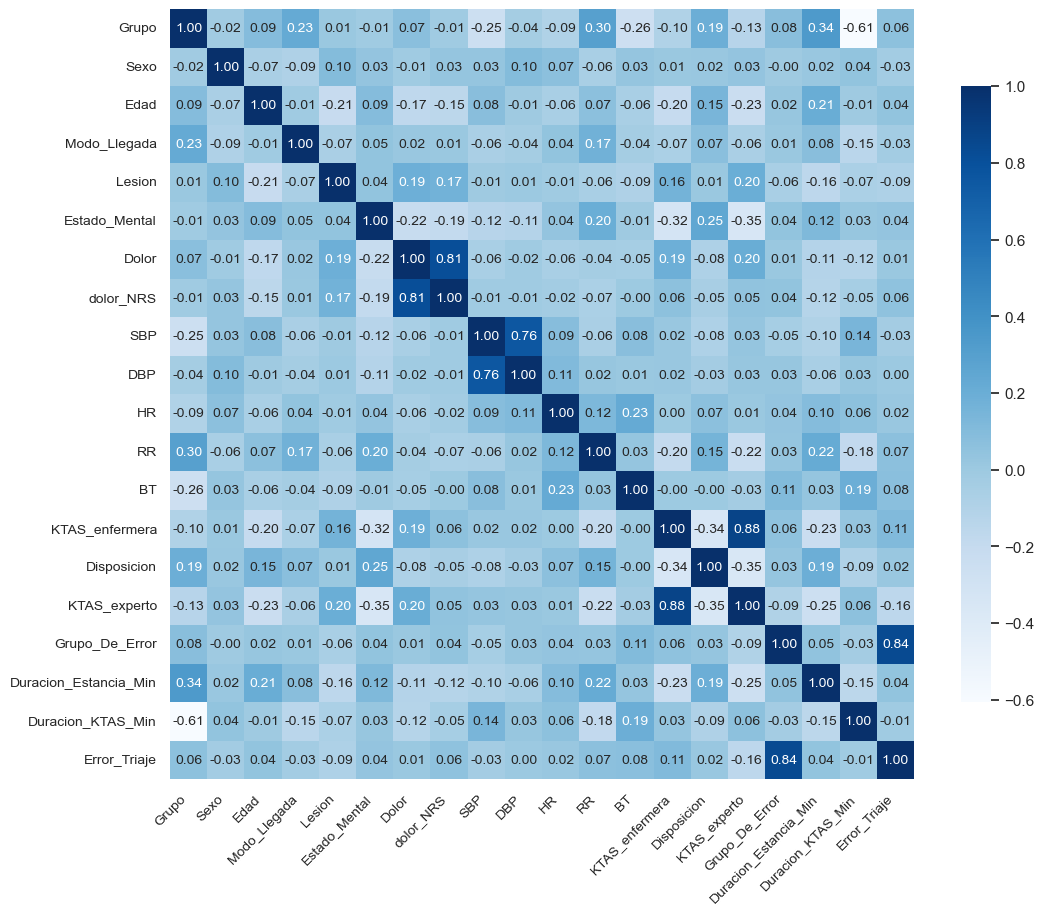

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [113]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)

En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

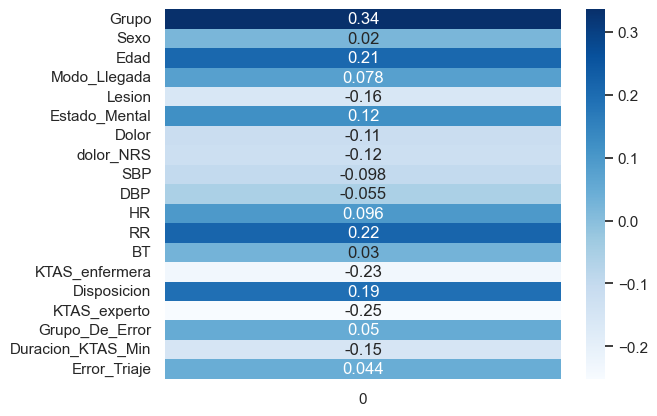

In [114]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente.

In [115]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje','Dolor','Grupo_De_Error'])

**One hot encoding**

In [116]:
columns_to_encode = [ 'Sexo', 'Disposicion', 'KTAS_experto', 'Modo_Llegada', 'Lesion', 'Estado_Mental']

# Aplicamos one hot encoding
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Visualizamos el DataFrame resultante
print(data_encoded.head())

   Grupo  Edad  dolor_NRS    SBP     HR    RR    BT  Duracion_Estancia_Min  \
0      2    49          2  150.0   92.0  20.0  36.2                   1591   
1      2    30          4  140.0   76.0  20.0  36.3                    211   
2      2    61          3  100.0   84.0  20.0  36.4                    119   
3      2    61          4  120.0   76.0  20.0  36.5                    414   
4      1    67          1  143.0  130.0  20.0  38.1                    267   

   Duracion_KTAS_Min  Sexo_2  Disposicion_2  Disposicion_3  Disposicion_4  \
0                2.0    True           True          False          False   
1                3.0    True          False          False          False   
2                2.0   False          False          False          False   
3                2.0    True          False          False          False   
4                3.6    True          False          False          False   

   Disposicion_5  Disposicion_6  Disposicion_7  KTAS_experto_2  \
0 

Se hace one'hot encoding de las columnas categoricas.

#### Separar variable objetivo

### Implementación de modelos